In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':22})

In [2]:
def get_rdf_info(rdf_file):
    """

    :param rdf_file:
    :return:
    """
    with open(rdf_file, 'r') as rdf_file:

        # Create a holder to load the file
        rdf_holder = []
        step_holder = []

        # Skip the header
        for x in range(3):
            _ = rdf_file.readline()

        # Load a new line
        line = rdf_file.readline()
        while line:

            # Parse the new line
            words = line.split()

            # If there are only two words, then this is a description line
            if len(words) == 2:

                # Save the step number
                step_holder.append(int(words[0]))

                # Create a new entry in the rdf holder
                # Because a new description line
                # means the following data are from a new MD snapshot
                rdf_holder.append([])

            # otherwise, this is a data line
            else:
                rdf_holder[-1].append([float(words[y]) for y in range(1, 4)])

            # Load a new line
            line = rdf_file.readline()

    return np.array(step_holder, dtype=np.int64), np.array(rdf_holder, dtype=np.float64)


In [3]:
runInfo, rdfData = get_rdf_info("./output/myRDF.rdf")

average_rdf = np.mean(rdfData, axis=0)
std_rdf = np.std(rdfData, axis=0)

FileNotFoundError: [Errno 2] No such file or directory: './output/myRDF.rdf'

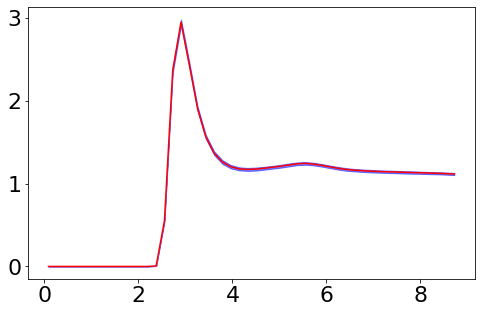

In [51]:
fig, axis=plt.subplots(ncols=1, nrows=1)
fig.set_figwidth(8)
fig.set_figheight(5)

axis.fill_between(average_rdf[:,0],
                  average_rdf[:,1] - std_rdf[:,1],
                  average_rdf[:,1] + std_rdf[:,1],
                  color='b', alpha=0.5)
axis.plot(average_rdf[:,0], average_rdf[:,1], 'r')

plt.show()